# Project Two

Question: What material (aluminum, steel, or styrofoam) will insulate water the best? 
The answer can tell us the best insulator between the three materials.
The answer matters to the food industry and the medical industry. The food industry needs to
keep meats below certain temperatures so that they do not become breeding grounds for bacteria, 
and the medical industry needs to keep certain fluids and organs for transplant at certain temperature so
that they stay viable.

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

Material: state is liquid
system includes conductivity constant of the thermos material, area of contact between conductor and water, thickness 
of thermos, mass of water, and the conductivity constant of water.

In [2]:
def make_system(conductivitym, area, thickness, mass, conductivityl):
    """Make a system object for the candymaking model.
    
    conductivitym = conductivity of material in joules/gram degrees Celcius
    area = contact between conductor and water in meters
    thickness = thickness of thermos in meters
    mass = mass of water in grams
    conductivityl = conductivity constant of water in joules/gram degrees Celcius
    
    returns: System object
    """
    init = State(L=22)
    init /= np.sum(init)

    t0 = 1
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  conductivitym=conductivitym, area=area, thickness=thickness,
                  mass=mass, conductivityl=conductivityl)

In [3]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables C aka candy
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    L = state.L
    
    unpack(system)
    
    dT = 22 - L
    heat = conductivitym * area * dT / thickness * mass * conductivityl * .01
    
    
    L += heat
    
    return State(L=L)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [5]:
conductivitym = 385
area = .2
thickness = 5
mass = 1
conductivityl = .3
system = make_system(conductivitym, area, thickness, mass, conductivityl)

,values
init,L 1.0 dtype: float64
t0,1
t_end,200
conductivitym,385
area,0.2
thickness,5
mass,1
conductivityl,0.3


In [6]:
results = run_simulation(system, update_func)

,L
1,1.000000
2,1.970200
3,2.895577
4,3.778201
5,4.620048
6,5.423002
7,6.188859
8,6.919334
9,7.616061
10,8.280599


Results:

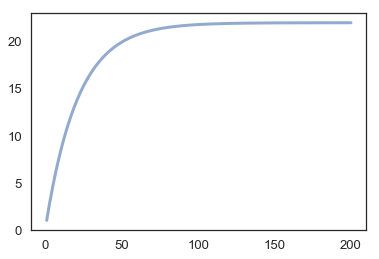

In [7]:
plot(results.L)

In [8]:
def update_multires(state, t, system):
    """Update the SIR model.
    
    state: State with variables C aka candy
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    x = state.x
    
    unpack(system)
    
    airres = athickness / ( athermalconductivity * aarea)
    glassres = gthickness / ( gthermalconductivity * garea)
    metalres = mthickness / ( mthermalconductivity * marea)
    
    totalresistance = airres + glassres + metalres
    
    thermalresistance = tempdifference / totalresistance
    
    x += heat
    
    return State(x=x)

In [16]:
def slope_func(state, t, system):
    "Update the SIR model."
    
    "state: State with variables C aka candy"
    "t: time step"
    "system: System with beta and gamma"
    
    "returns: State object"

    
    unpack(system)
    L = state
    
    dT = 22 - L
    heat = conductivitym * area * dT / thickness * mass * conductivityl * .01
    
    
    L += heat
    
    return State(heat=heat)

In [17]:
results = run_simulation(system, update_func)

,L
1,1.000000
2,1.970200
3,2.895577
4,3.778201
5,4.620048
6,5.423002
7,6.188859
8,6.919334
9,7.616061
10,8.280599


In [18]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,80
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


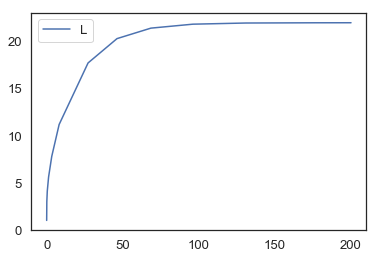

In [19]:
results.plot()

In [14]:
results, details = run_ode_solver(system, slope_func, max_step=2)
details

,values
sol,None
t_events,[]
nfev,620
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


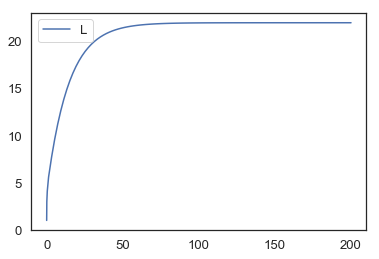

In [15]:
results.plot()